In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("1-studyhours.csv")

In [4]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [6]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


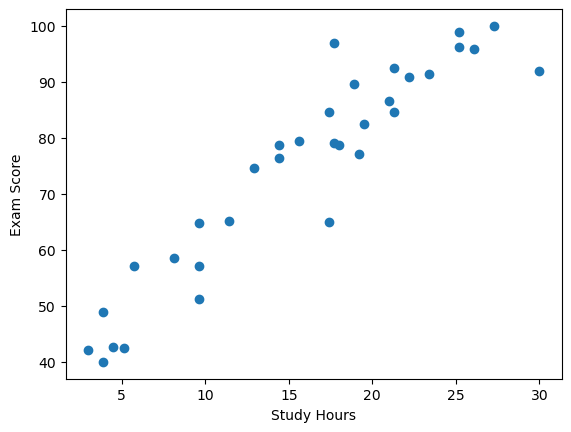

In [7]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

## independent(x) and dependent(y) features

In [9]:
X = df[["Study Hours"]] ## DataFrame 
y = df["Exam Score"]    ## Series

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
type(y)

pandas.core.series.Series

## model_selection -> Test - Train Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=15)

In [15]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [16]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [17]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [18]:
X_test

,Study Hours
25,5.1
14,21.0
30,23.4
16,5.7
24,9.6
20,3.9
19,21.3


## StandardScaler ->Standardize the data set

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [22]:
# balanced feature values (dengeli özellik değerleri)
# efficient gradient descent(Verimli Gradyan İnişi)
# l1(Lasso), l2(Ridge) (cezalar)

In [23]:
scaler= StandardScaler() 
# Kolonlar arasındaki büyük farkları gidermek için kullanırız
# (değerleri belli bir formüle göre küçültür)
# Daha kararlı sonuçlar elde etmek için kullanılır

In [24]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [25]:
X_train=scaler.fit_transform(X_train)  # Xstd=(X-mean)/X_train(std) 
X_test=scaler.transform(X_test) # fit -> data leakage (Data'nın sızdırılmasını önlemek gerekir)(trainin, test ile ilgili bilgilere erişmemesi gerekiyor )

In [26]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [27]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

## LinearRegression -> linear_model

In [29]:
from sklearn.linear_model import  LinearRegression

In [30]:
#  LinearRegression(n_jobs=-1) Pc'deki tüm cpu'ları kullanır(Uzun süren Regression'lar için )
regression= LinearRegression()

### Fit (Uyum)

In [32]:
regression.fit(X_train, y_train) ##  Eğitim(train) modeli hazırlandı,( fit : train için kullanılır)

LinearRegression()

In [33]:
print("Coefficient: ", regression.coef_) ## Teta1 
print("Intercept: ", regression.intercept_) ## Teta0 (y başlangıç)
# y=76.91 + 16.17x demek oluyor(Standardize edilmiş hali alınıyor(Ör: 18	17.4 ->0.11794385))

Coefficient:  [16.17860223]
Intercept:  76.9076923076923


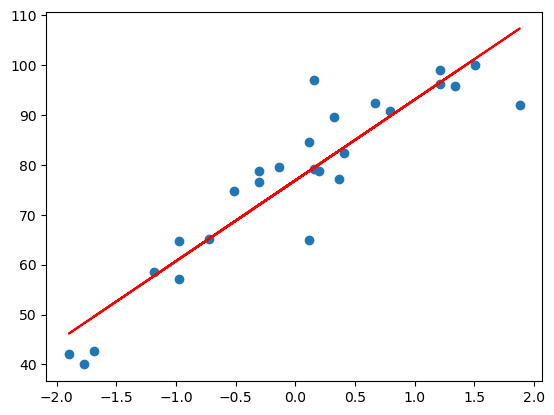

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), "r") ## Kırmızı çizgi best fit line oluyor
plt.show()

In [35]:
# x=20 , y=?

In [36]:
regression.predict([[20]]) ## Scaler kullanılmamış 

array([400.47973694])

In [37]:
scaler.transform([[20]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [38]:
regression.predict(scaler.transform([[20]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [39]:
## Yani 20 saat çalışan biri score'u 84.705 oluyor

In [40]:
regression.predict(scaler.transform([[10]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])

In [41]:
regression.predict(scaler.transform([[0]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.39784252])

In [42]:
regression.predict(scaler.transform([[25]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.0329235])

In [43]:
regression.predict(scaler.transform([[30]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([107.3599397])

### Prediction with test data

In [45]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [114]:
y_pred_test=regression.predict(X_test)
y_pred_test

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [47]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

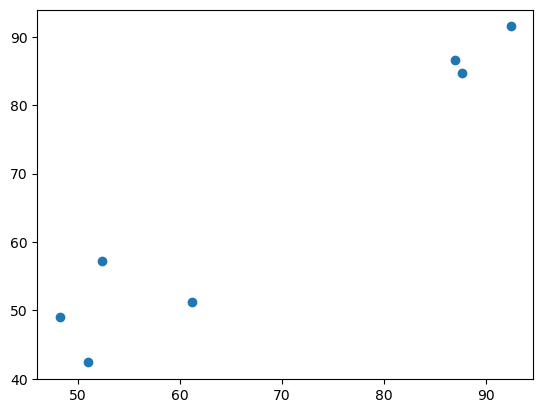

In [48]:
plt.scatter(y_pred_test,y_test)
plt.show()

# Regression Success Metrics

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print("MSE: ", mse)
print("MAE: ",mae)
print("RMSE: ",rmse)

MSE:  29.45839048833392
MAE:  4.054868128856142
RMSE:  5.427558427906043


### R2 Score

In [53]:
r2= r2_score(y_test, y_pred_test)
print("R2 Score: ", r2)

R2 Score:  0.9196596206825491


### Adjusted R2 Score

In [55]:
# 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.903591544819059